In [3]:
from plotutil import *

datasetname = "iris"
energytype = "cluster"
save = False
k = 3
savename_pre = f"./figures/{datasetname}_{energytype}_k{k}"

X, labels = load_dataset(datasetname)
n = X.shape[1]

p_vals = [1, 2, 5, 'inf']
all_results = {}
for p in p_vals:
    with open(f"./results/{datasetname}_{energytype}_k{k}_p{p}_ns10.pkl", "rb") as f:
        all_results[p] = pickle.load(f)

# Energy as a function of k

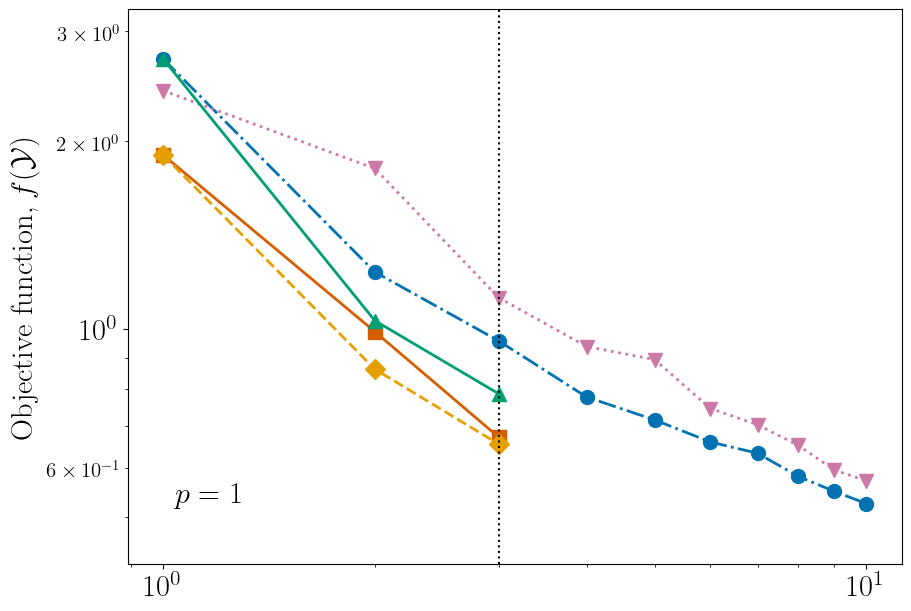

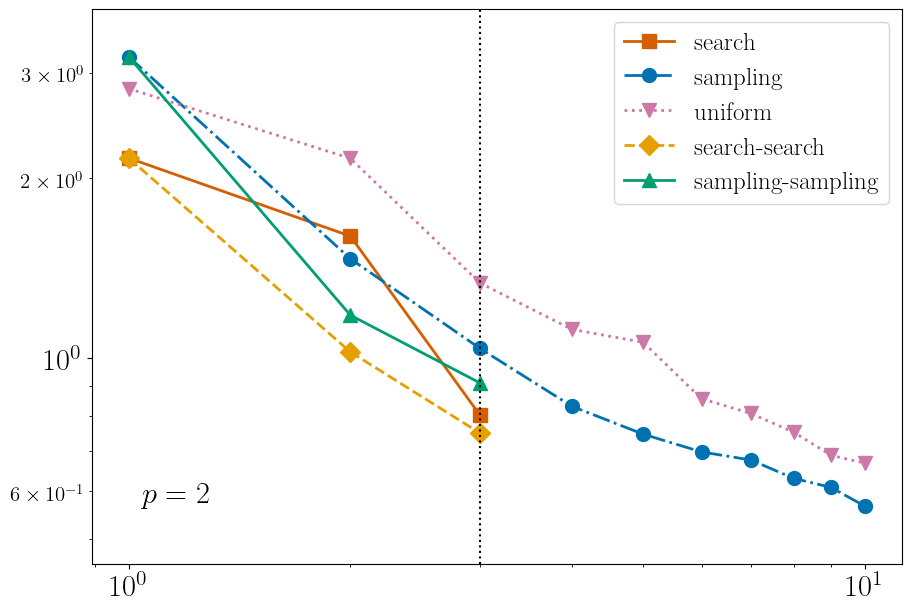

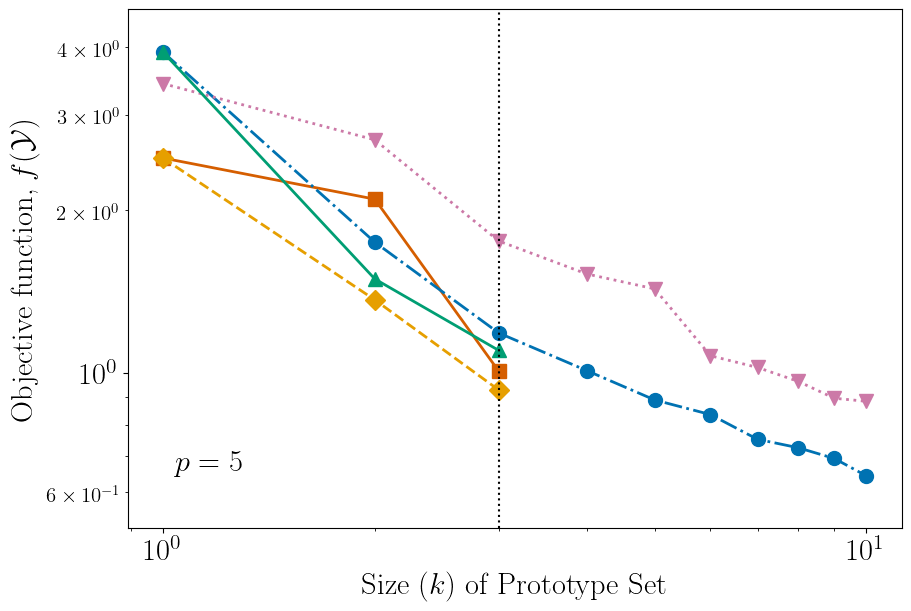

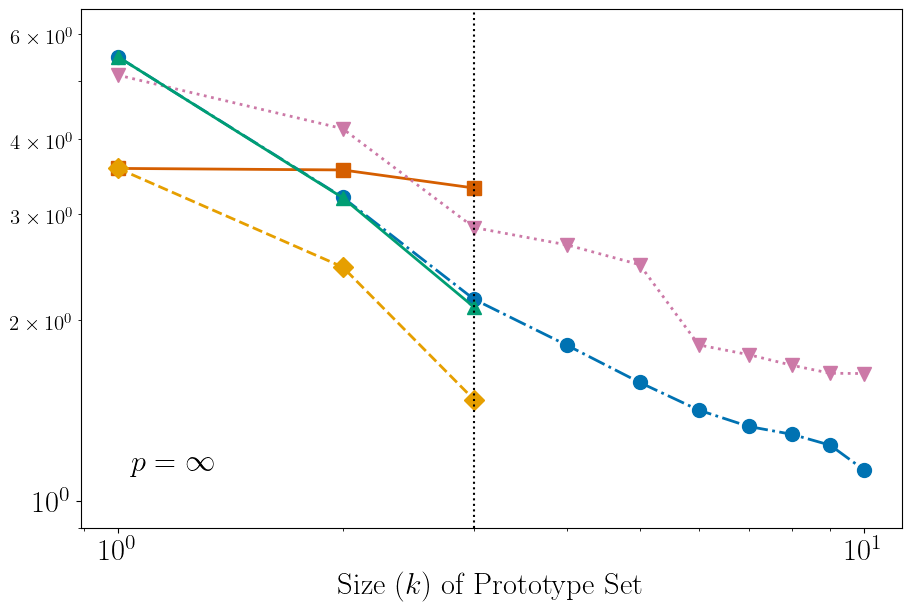

In [5]:
for loc, p in enumerate([1,2,5,'inf']):
    show_svals = (p == 2) & (energytype == "lowrank")
    results = all_results[p]
    energy_data = get_k_by_energy(results, n, p=p)
    savename = f"{savename_pre}_p{p}_energyvsk.png"

    fig, ax = plt.subplots(figsize=(9,6), constrained_layout=True)
    ymin_ = np.inf 
    ymax_ = -np.inf
    kmax = 0

    for method, energies in energy_data.items():
        if method == "sampling_search":
            continue
        vals = energies.mean(axis=0)
        
        ymin_ = min(ymin_, vals.min())
        ymax_ = max(ymax_, vals.max())
        
        if energies.shape[1] > kmax:
            kmax = energies.shape[1]
        ax.plot(np.arange(1, energies.shape[1]+1), vals, marker=markers[get_idx[method]], \
                linestyle=linestyles[get_idx[method]], label=names[get_idx[method]], markersize=10, linewidth=2.0, color=colors[get_idx[method]])

    if show_svals:
        svals = np.linalg.svd(X, full_matrices=False, compute_uv=False)
        if p is not None:
            svals_ = np.array([np.linalg.norm(svals[j:], ord=p) / n**(1.0/float(p)) for j in range(1, kmax+1)])
        else:
            svals_ = np.array([svals[j] for j in range(1, kmax+1)])
            
        ax.plot(np.arange(1, kmax+1), svals_, \
                marker=markers[-1], linestyle=linestyles[-1], label=r"optimal", \
                    markersize=10, linewidth=2.0, color=colors[-1])
        ymin_ = min(ymin_, svals_.min())
        ymax_ = max(ymax_, svals_.max())

    ymin = ymin_ * 0.8
    ymax = ymax_ * 1.2
        
    ax.set_ylim([ymin, ymax])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_autoscale_on(False)  # Disable autoscaling entirely
    ax.vlines(x=k, color='k', linestyles=':', ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1])
    plt.tick_params(axis='x', labelsize=22)
    plt.tick_params(axis='y', labelsize=22)

    if loc == 1:
        ax.legend(loc='upper right', fontsize=18)
    else:
        if loc > 1:
            ax.set_xlabel(r"Size $(k)$ of Prototype Set", fontsize=22)
            if loc == 2:
                ax.set_ylabel(r"Objective function, $f(\mathcal{Y})$", fontsize=22)
        else:
            ax.set_ylabel(r"Objective function, $f(\mathcal{Y})$", fontsize=22)
    pstr = str(p) if p != "inf" else r'\infty'
    ax.text(x=0.06, y=0.1, s=fr"$p = {pstr}$", 
        ha='left', va='bottom', transform=ax.transAxes, 
        fontsize=22)
    if save:
        plt.savefig(savename, format="png", dpi=500, bbox_inches='tight')
    plt.show()

# Energy as a function of time/function calls

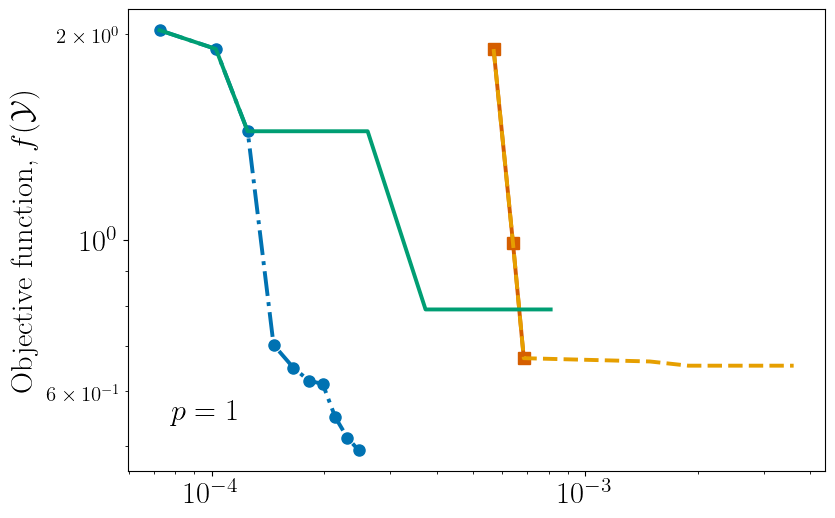

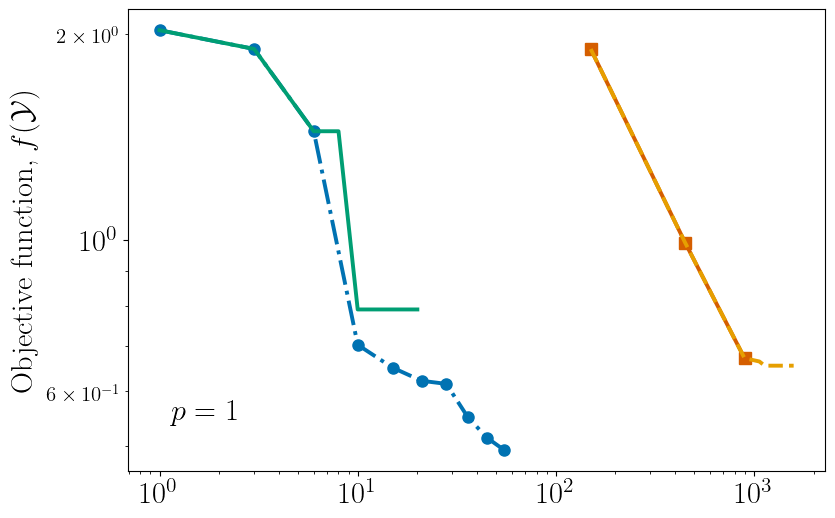

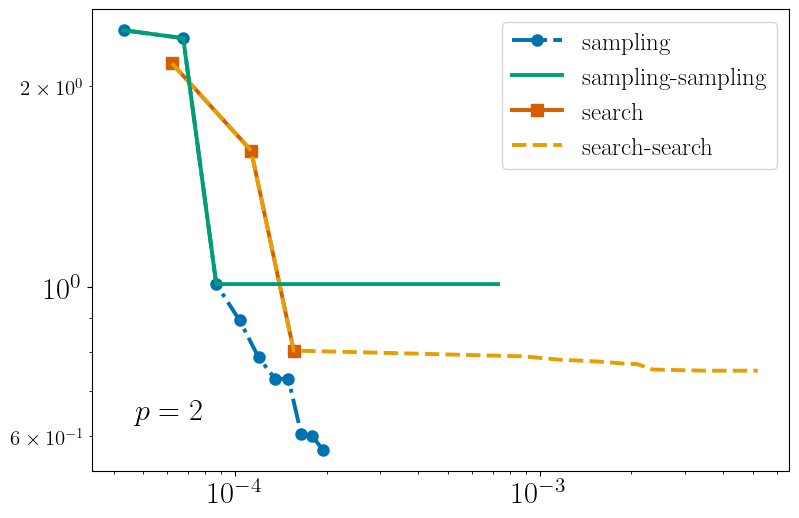

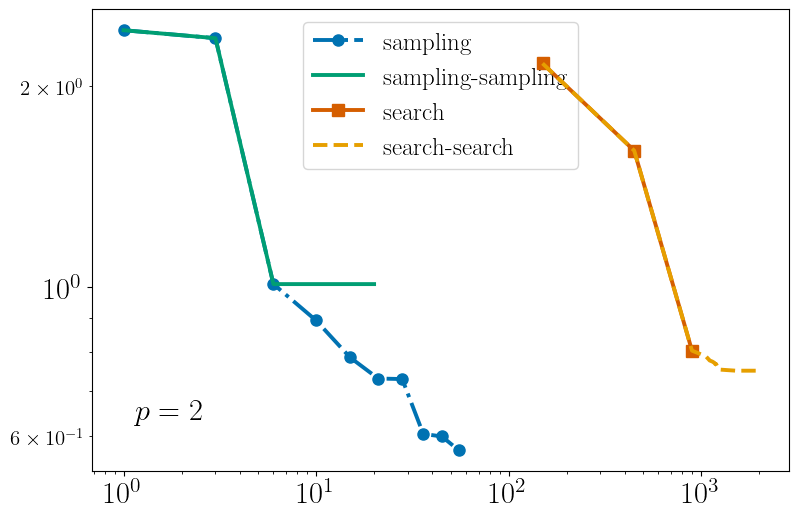

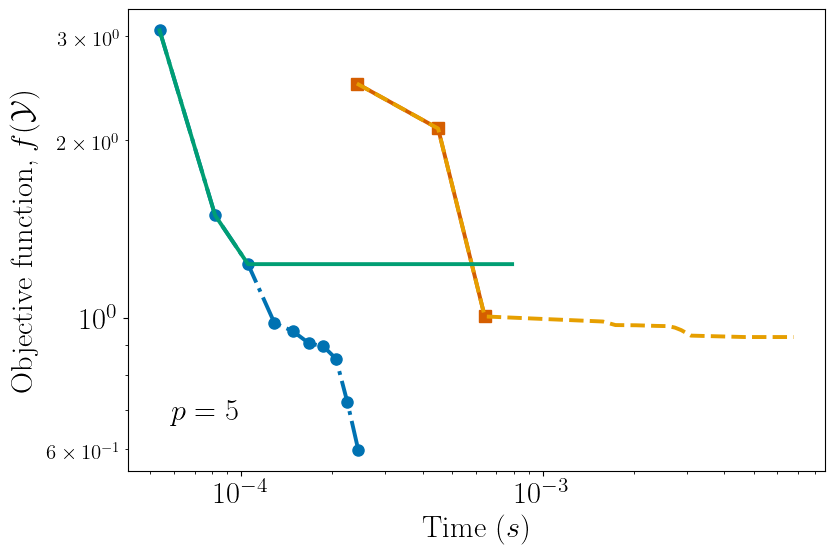

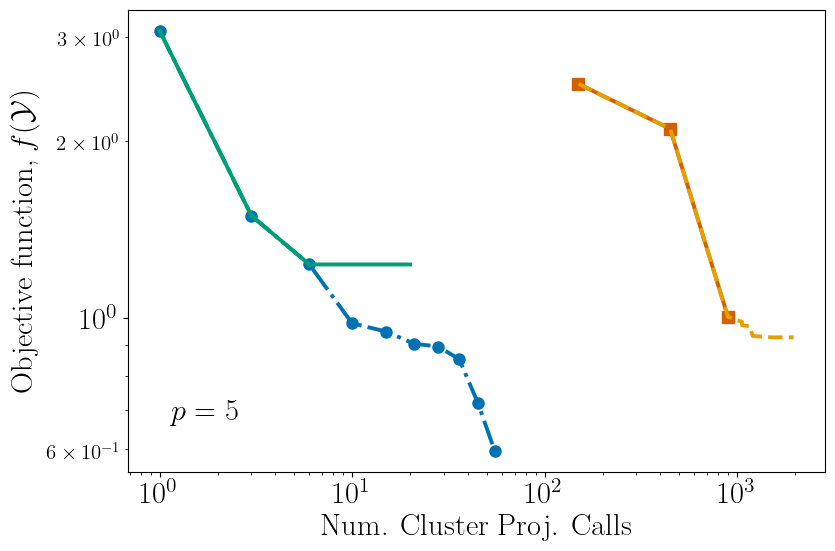

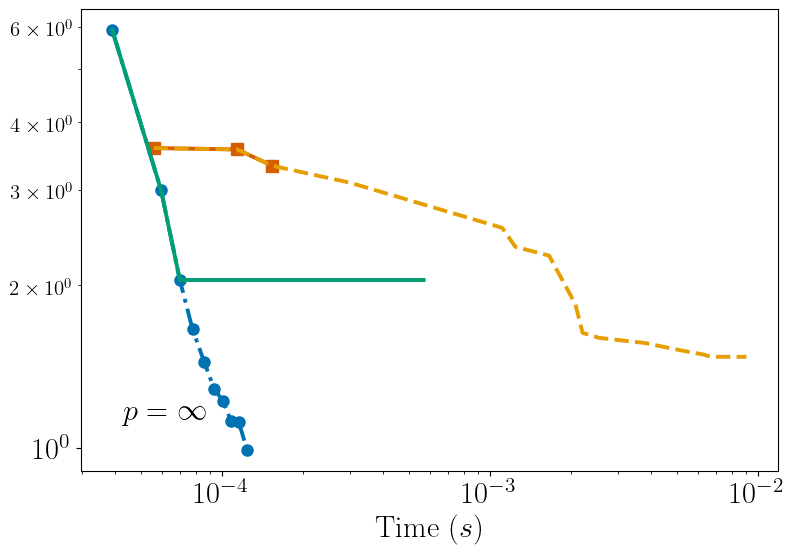

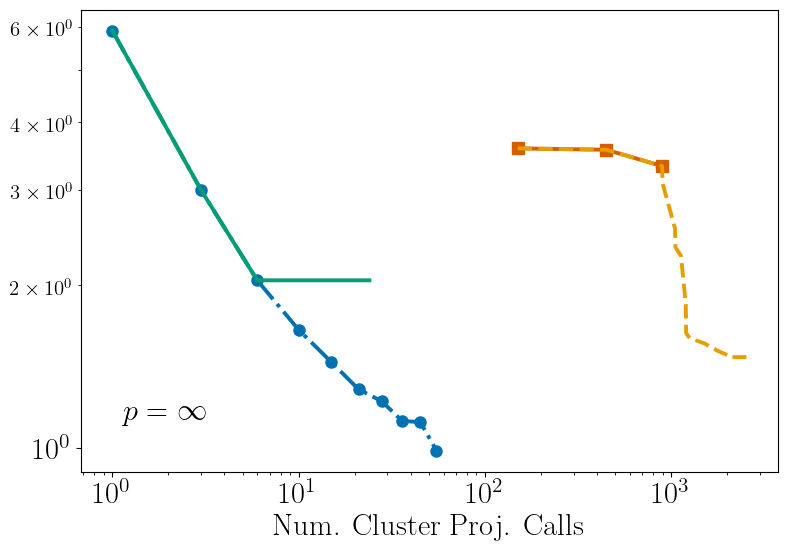

In [6]:
for loc, p in enumerate([1,2,5, 'inf']):
    results = all_results[p]
    
    time_data = get_time_by_energy(results, n, k=k, p=p)
    calls_data = get_calls_by_energy(results, n, k=k, p=p)


    ################################# plot time data
    fig, ax = plt.subplots(figsize=(9,6))
    for method, (y, x) in time_data.items():
        is_build = len(method.split("_")) == 1
        ax.plot(x[0], y[0], color=colors[get_idx[method]],
                marker=markers[get_idx[method]] if is_build else None, linestyle=linestyles[get_idx[method]],
                linewidth=2.8, label=names[get_idx[method]], markersize=8, zorder=plotorder[method])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.tick_params(axis='x', labelsize=22)
    ax.tick_params(axis='y', labelsize=22)
    if loc == 1:
        ax.legend(loc='upper right', fontsize=18)
    else:
        if loc > 1:
            ax.set_xlabel(rf"Time ($s$)", fontsize=22)
            if loc == 2:
                ax.set_ylabel(r"Objective function, $f(\mathcal{Y})$", fontsize=22)
        else:
            ax.set_ylabel(r"Objective function, $f(\mathcal{Y})$", fontsize=22)
    pstr = str(p) if p != "inf" else r'\infty'
    ax.text(x=0.06, y=0.1, s=fr"$p = {pstr}$", 
        ha='left', va='bottom', transform=ax.transAxes, 
        fontsize=22)
    if save:
        plt.savefig(f"{savename_pre}_p{p}_energyvstime.png", format="png", dpi=500, bbox_inches='tight')
    plt.show()

    ########################## plot calls data
    fig, ax = plt.subplots(figsize=(9,6))
    for method, (y, x) in calls_data.items():
        is_build = len(method.split("_")) == 1
        ax.plot(x[0], y[0], color=colors[get_idx[method]],
                marker=markers[get_idx[method]] if is_build else None, linestyle=linestyles[get_idx[method]],
                linewidth=2.8, label=names[get_idx[method]], markersize=8, zorder=plotorder[method])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.tick_params(axis='x', labelsize=22)
    ax.tick_params(axis='y', labelsize=22)

    if loc == 1:
        ax.legend(loc='upper center', fontsize=18)
    else:
        if loc > 1:
            ax.set_xlabel(rf"Num. {energytype.capitalize()} Proj. Calls", fontsize=22)
            if loc == 2:
                ax.set_ylabel(r"Objective function, $f(\mathcal{Y})$", fontsize=22)
        else:
            ax.set_ylabel(r"Objective function, $f(\mathcal{Y})$", fontsize=22)
    pstr = str(p) if p !="inf" else r'\infty'
    ax.text(x=0.06, y=0.1, s=fr"$p = {pstr}$", 
        ha='left', va='bottom', transform=ax.transAxes, 
        fontsize=22)
    if save:
        plt.savefig(f"{savename_pre}_p{p}_energyvscalls.png", format="png", dpi=500, bbox_inches='tight')
    plt.show()


# Visualize Prototypes